In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import matplotlib.dates as mdates
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

In [2]:
data_case = pd.read_csv("../data/data_2023-Nov-16.csv")
data_case.head()

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate
0,nation,England,E92000001,2023-11-14,355,21003340,NaN,19370997,NaN,1631595.0
1,nation,England,E92000001,2023-11-13,606,21002985,198.0,19370997,177.0,1631595.0
2,nation,England,E92000001,2023-11-12,531,21002379,276.0,19370799,210.0,1631418.0
3,nation,England,E92000001,2023-11-11,210,21001848,132.0,19370523,57.0,1631208.0
4,nation,England,E92000001,2023-11-10,150,21001638,80.0,19370391,32.0,1631151.0


In [27]:
data_case = data_case[["date", "newCasesBySpecimenDate"]]
data_case = data_case.rename(columns={"newCasesBySpecimenDate": "new_cases"})
data_case["date"] = pd.to_datetime(data_case["date"])
data_case = data_case.set_index("date")
data_case.head()

,new_cases
date,
2023-11-14,355
2023-11-13,606
2023-11-12,531
2023-11-11,210
2023-11-10,150


In [6]:
data_death = pd.read_csv("../data/data_2023-Nov-16 (2).csv")
data_death.head()

,areaType,areaName,areaCode,date,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate
0,nation,England,E92000001,2023-10-20,45,196386
1,nation,England,E92000001,2023-10-19,48,196341
2,nation,England,E92000001,2023-10-18,45,196293
3,nation,England,E92000001,2023-10-17,50,196248
4,nation,England,E92000001,2023-10-16,39,196198


In [ ]:
data_death = data_death[["date", "newDeaths28DaysByDeathDate"]]

In [9]:
data_mv = pd.read_csv("../data/data_2023-Nov-16 (4).csv")
data_mv.head()

,areaType,areaName,areaCode,date,covidOccupiedMVBedsWeekly
0,nation,England,E92000001,2023-05-26,79
1,nation,England,E92000001,2023-05-19,92
2,nation,England,E92000001,2023-05-12,102
3,nation,England,E92000001,2023-05-05,100
4,nation,England,E92000001,2023-04-28,94


In [11]:
data_vacc = pd.read_csv("../data/data_2023-Nov-16 (5).csv")
data_vacc.head()

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
0,nation,England,E92000001,2023-11-15,0.0,NaN,0.0,45417090.0,0.0,42951064.0,0.0,33906503.0
1,nation,England,E92000001,2023-11-14,0.0,NaN,0.0,45417090.0,0.0,42951064.0,0.0,33906503.0
2,nation,England,E92000001,2023-11-13,0.0,NaN,0.0,45417090.0,0.0,42951064.0,0.0,33906503.0
3,nation,England,E92000001,2023-11-12,0.0,NaN,0.0,45417090.0,0.0,42951064.0,0.0,33906503.0
4,nation,England,E92000001,2023-11-11,0.0,NaN,0.0,45417090.0,0.0,42951064.0,0.0,33906503.0


In [14]:
# Creating the dataframe from the provided data
admission_data = pd.DataFrame({
    'AgeGroup': ['85+', '65 - 84', '6 - 17', '18 - 64', '0 - 5'],
    'AdmissionsUnsorted': [238128, 443513, 15230, 366215, 24881],
    'AdmissionRateUnsorted': [16931.6, 4896.6, 186.5, 1077.3, 633.3]
})

# Sorting the data as requested
admission_data_sorted = admission_data.sort_values(by=['AgeGroup'], ascending=True)
# Save the sorted DataFrame to a CSV file
admission_data_sorted.to_csv("../data/sorted_admissions_data.csv", index=False)

In [15]:
admission_data_sorted

,AgeGroup,AdmissionsUnsorted,AdmissionRateUnsorted
4,0 - 5,24881,633.3
3,18 - 64,366215,1077.3
2,6 - 17,15230,186.5
1,65 - 84,443513,4896.6
0,85+,238128,16931.6


In [16]:
fil_dt = pd.read_csv("../data/filtered_data.csv")
fil_dt.head()

,areaCode,areaName,areaType,date,covidOccupiedMVBeds,cumAdmissions,hospitalCases,newAdmissions
0,E40000007,East of England,nhsRegion,2023-05-31,5.0,105345,262.0,40
1,E40000007,East of England,nhsRegion,2023-05-30,3.0,105305,252.0,40
2,E40000007,East of England,nhsRegion,2023-05-29,4.0,105265,258.0,51
3,E40000007,East of England,nhsRegion,2023-05-28,6.0,105214,261.0,32
4,E40000007,East of England,nhsRegion,2023-05-27,8.0,105182,263.0,27


In [25]:
fil_dt['date'] = pd.to_datetime(fil_dt['date'])
agg_fil_dt = fil_dt.groupby(['date']).sum()
agg_fil_dt.head()

,areaCode,areaName,areaType,covidOccupiedMVBeds,cumAdmissions,hospitalCases,newAdmissions
date,,,,,,,
2020-04-02,E40000007E40000009E40000005E40000010E40000008E...,East of EnglandNorth East and YorkshireSouth E...,nhsRegionnhsRegionnhsRegionnhsRegionnhsRegionn...,1494.0,26264,12135.0,2932
2020-04-03,E40000007E40000009E40000005E40000010E40000008E...,East of EnglandNorth East and YorkshireSouth E...,nhsRegionnhsRegionnhsRegionnhsRegionnhsRegionn...,1788.0,28828,13635.0,2564
2020-04-04,E40000007E40000009E40000005E40000010E40000008E...,East of EnglandNorth East and YorkshireSouth E...,nhsRegionnhsRegionnhsRegionnhsRegionnhsRegionn...,1950.0,31421,15469.0,2593
2020-04-05,E40000007E40000009E40000005E40000010E40000008E...,East of EnglandNorth East and YorkshireSouth E...,nhsRegionnhsRegionnhsRegionnhsRegionnhsRegionn...,2097.0,34013,16657.0,2592
2020-04-06,E40000007E40000009E40000005E40000010E40000008E...,East of EnglandNorth East and YorkshireSouth E...,nhsRegionnhsRegionnhsRegionnhsRegionnhsRegionn...,2264.0,36692,17154.0,2679


In [26]:
agg_fil_dt = agg_fil_dt.drop(['areaCode', "areaName", "areaType"], axis=1)
agg_fil_dt.head()

,covidOccupiedMVBeds,cumAdmissions,hospitalCases,newAdmissions
date,,,,
2020-04-02,1494.0,26264,12135.0,2932
2020-04-03,1788.0,28828,13635.0,2564
2020-04-04,1950.0,31421,15469.0,2593
2020-04-05,2097.0,34013,16657.0,2592
2020-04-06,2264.0,36692,17154.0,2679


In [28]:
agg_fil_dt.to_csv("../data/agg_filtered_data.csv")

In [30]:
import pandas as pd

# File paths for the CSV files
file_paths = [
    '../data/data_2023-Nov-16.csv',
    '../data/data_2023-Nov-16 (1).csv',
    '../data/data_2023-Nov-16 (2).csv',
    '../data/data_2023-Nov-16 (3).csv',
    '../data/data_2023-Nov-16 (4).csv',
    '../data/data_2023-Nov-16 (5).csv',
    '../data/agg_filtered_data.csv'
]

# Loading the datasets
datasets = [pd.read_csv(file) for file in file_paths]

# Selecting relevant columns from each dataset
# Dataset 6 (agg_filtered_data.csv) - MV Beds Occupied (Daily), Hospital Cases & New Admissions
mv_beds_occupied = datasets[6][['date', 'covidOccupiedMVBeds']]
hospital_cases = datasets[6][['date', 'hospitalCases']]
new_admissions = datasets[6][['date', 'newAdmissions']]

# Dataset 0 - New COVID-19 Cases
new_cases = datasets[0][['date', 'newCasesBySpecimenDate']]

# Dataset 2 - New COVID-19 Deaths
new_deaths = datasets[2][['date', 'newDailyNsoDeathsByDeathDate']]

# Dataset 5 - New Vaccinations
new_vaccinations = datasets[5][['date', 'newVaccinesGivenByPublishDate']]

# Merging all datasets on the 'date' column
combined_data = pd.merge(mv_beds_occupied, hospital_cases, on='date', how='outer')
combined_data = pd.merge(combined_data, new_admissions, on='date', how='outer')
combined_data = pd.merge(combined_data, new_cases, on='date', how='outer')
combined_data = pd.merge(combined_data, new_deaths, on='date', how='outer')
combined_data = pd.merge(combined_data, new_vaccinations, on='date', how='outer')

# Ensuring 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Renaming columns for clarity
combined_data.columns = ['Date', 'MV Beds Occupied', 'Hospital Cases', 'New Admissions', 'New COVID-19 Cases', 'New COVID-19 Deaths', 'New Vaccinations']

# Displaying the combined dataframe
combined_data.head()


,Date,MV Beds Occupied,Hospital Cases,New Admissions,New COVID-19 Cases,New COVID-19 Deaths,New Vaccinations
0,2020-04-02,1494.0,12135.0,2932.0,4097.0,892.0,NaN
1,2020-04-03,1788.0,13635.0,2564.0,4102.0,927.0,NaN
2,2020-04-04,1950.0,15469.0,2593.0,3405.0,1023.0,NaN
3,2020-04-05,2097.0,16657.0,2592.0,3094.0,1063.0,NaN
4,2020-04-06,2264.0,17154.0,2679.0,4407.0,1025.0,NaN


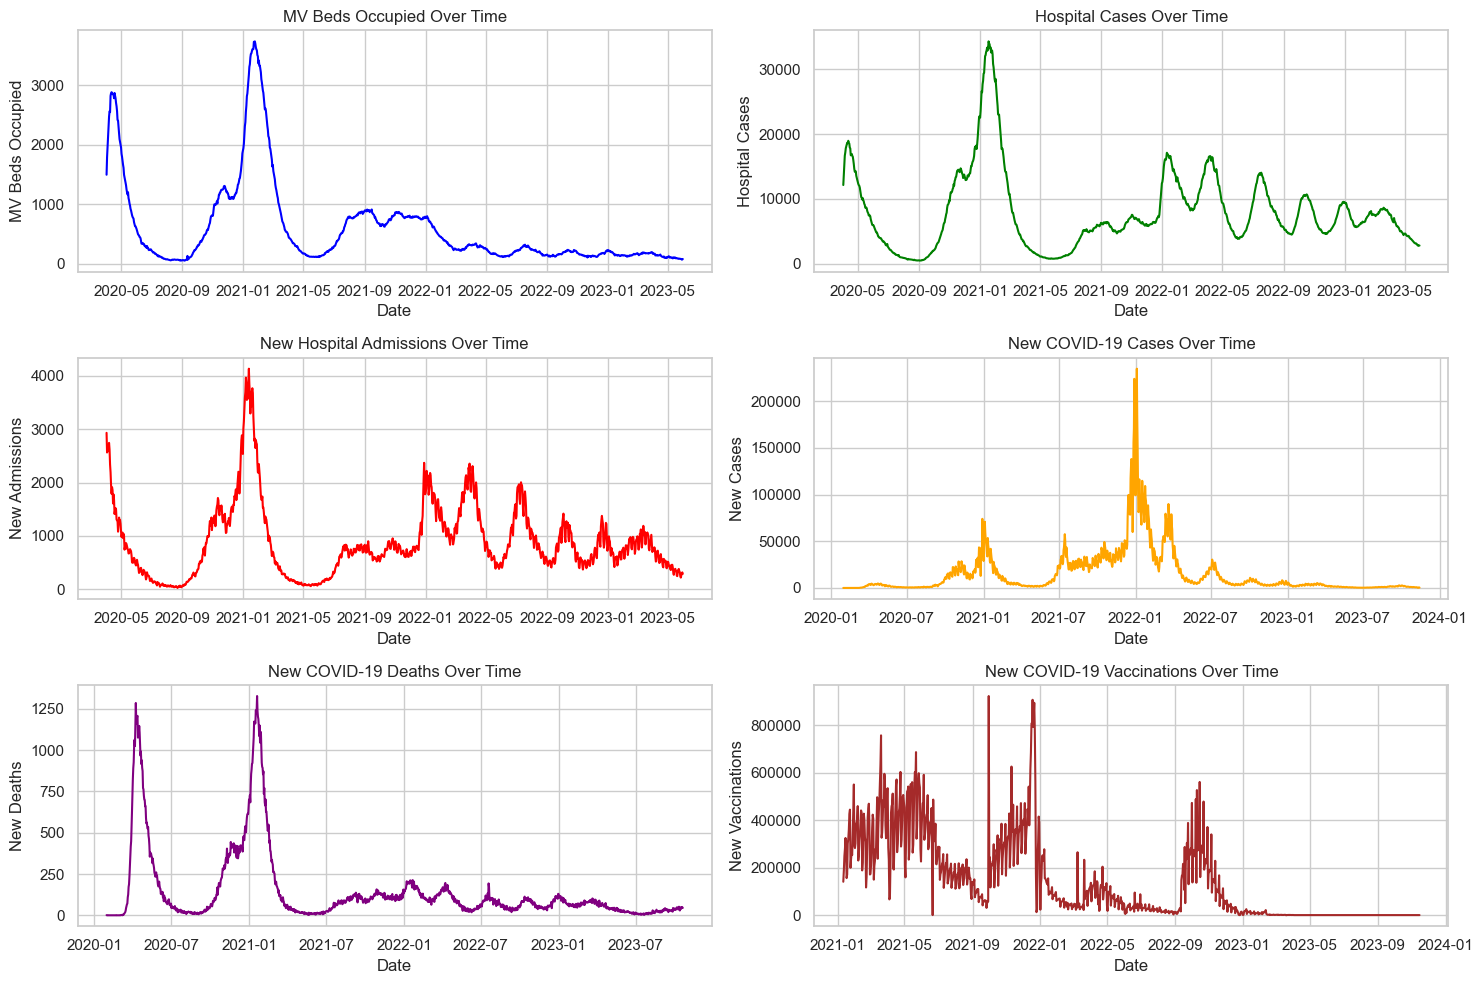

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visualization style
sns.set(style="whitegrid")

# Visualizing all the data
plt.figure(figsize=(15, 10))

# MV Beds Occupied
plt.subplot(3, 2, 1)
sns.lineplot(data=combined_data, x='Date', y='MV Beds Occupied', color='blue')
plt.title('MV Beds Occupied Over Time')
plt.xlabel('Date')
plt.ylabel('MV Beds Occupied')

# Hospital Cases
plt.subplot(3, 2, 2)
sns.lineplot(data=combined_data, x='Date', y='Hospital Cases', color='green')
plt.title('Hospital Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Hospital Cases')

# New Admissions
plt.subplot(3, 2, 3)
sns.lineplot(data=combined_data, x='Date', y='New Admissions', color='red')
plt.title('New Hospital Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('New Admissions')

# New COVID-19 Cases
plt.subplot(3, 2, 4)
sns.lineplot(data=combined_data, x='Date', y='New COVID-19 Cases', color='orange')
plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')

# New COVID-19 Deaths
plt.subplot(3, 2, 5)
sns.lineplot(data=combined_data, x='Date', y='New COVID-19 Deaths', color='purple')
plt.title('New COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')

# New Vaccinations
plt.subplot(3, 2, 6)
sns.lineplot(data=combined_data, x='Date', y='New Vaccinations', color='brown')
plt.title('New COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')

plt.tight_layout()
plt.show()
